In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import linalg
import matplotlib as mpl
import ipywidgets
from ipywidgets import interact, FloatSlider
from opthelper import *

x = np.arange(10)
A = np.c_[x, np.ones(x.size)]
alpha = 2.0
beta = -1.0
sigma = 1.5
y = alpha*x + beta
np.random.seed(102944)
yn = y + sigma*np.random.randn(x.size)
ab = np.polyfit(x, yn, 1)
alph = np.linspace(-10, 10, 200) + ab[0]
bet = np.linspace(-20, 20, 200) + ab[1]
ma, mb = np.meshgrid(alph, bet)


def resid_func(x, yn):
    return lambda alpha, beta: yn - alpha*x - beta

resid=resid_func(x, yn)
resid = yn.reshape((-1, 1)) - np.dot(A, np.array([[0, 0]]).T)
fact = 1.0/ 17.09**2
many_alpha = [np.array([[0, 0.0]]).T]

for i in xrange(1000):
    landweber_interate(many_alpha, fact)

xy = (np.array(many_alpha).squeeze().T)[:, :100]

# Linear least squares

- Consider data $y$ fit to $A x$, where $x$ is a vector of parameters
- Define vector of residuals $r$,
    $$r = y - A x$$
- Objective: minimize square of residuals
    $$\begin{align}
f(x)& = \frac{1}{2} \lVert r \rVert^2 = \frac{1}{2} r^T r 
\end{align}$$

**What is special about least squares problems?**

Residuals give "free" information about derivatives

- What is the gradient?
    - By the chain rule,
        $$\begin{align}
 \nabla f = - A^T r
\end{align}$$
    - Residuals projected back to the space of $x$ is the steepest descent direction
- What is the Hessian?
    $$ \nabla^2 f = A^T A $$
    - In non-linear least squares, Jacobian of residuals $J$ gives a good guess for the Hessian.
- Linear least squares is also convex, local minimum = global mimimum.

## Example

$$ y \sim \mathcal{N}(\alpha t + \beta, \sigma) $$

This can be formulated using matrices as,

$$f(x) = \frac{1}{2} \lVert y - A x\rVert ^2$$

where

$$
x = \begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}
$$

$$
A = \begin{pmatrix}
t_1 & 1 \\
t_2 & 1 \\
\vdots & \vdots \\
t_N & 1
\end{pmatrix}
$$



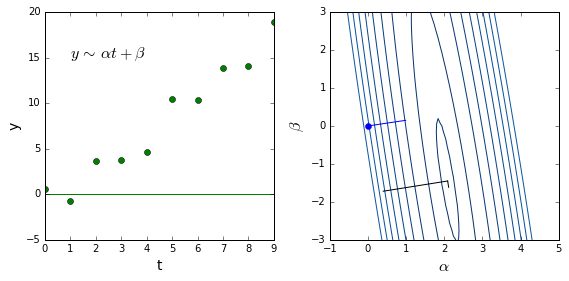

In [2]:
state = manipulate_line(0.0, 0.0)
u1 = lambda alpha, beta: update_plot(state, alpha, beta)

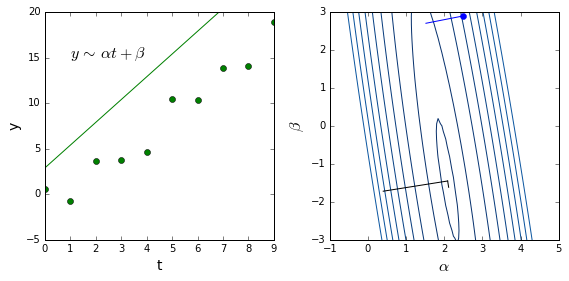

In [3]:
ipywidgets.interact(u1, alpha=FloatSlider(min=-1.0, max=5.0, step=0.1, value=0.0, description=r"$\alpha$"),
                        beta=FloatSlider(min=-3.0, max=3.0, step=0.1, value=0.0, description=r"$\beta$"))

The above widget shows,
 
 - **left:** line  with different values of $\alpha$, $\beta$
 - **right:** contours of $f$, the function to be mimimized
     - blue dot: current guess
     - blue line: current steepest descent direction $-\nabla f$
     - black lines: basis vectors of the singular value decomposition of $A$

## Geometric interpretation of $A x$

<img alt="Four subspaces" src="img/strang1993nov-fig1.png" width=640px>
The four fundemental subspaces.

## Geometric interpretation: least squares problem

<img alt="Least squares problem" src="img/Strang1993nov-fig2.png" width=640px>

## Geometric interpretation: least squares solution

<img alt="Least squares solution" src="img/Strang1993nov-fig4.png" width=640px>


## Landweber iteration

Choose the next value of the parameter vector $x$ using,

$$\begin{align}
x_{k+1}& = x_k - \alpha \, A^T r_k \\
\end{align}$$

- This is gradient descent with a fixed step size, using the residuals $r$ to compute the gradient direction (since $\nabla f(x_k) = - A^T r_k$).

**Stability**

- Write,

    $$x_k = x^+ + e_k$$
  
  where $x^+$ is the least squares solution, $e_k$ the error at the $k^\text{th}$ iteration. Then the iteration can be written as,
  
  $$ \begin{align}
  x_{k+1}& = x^+ + e_{k+1} = x^+ + e_k - \alpha \, A^T A e_k &\\
  e_{k+1}& = (I - \alpha A^T A) e_k
  \end{align}
  $$
  
  For an initial guess of $\mathbf{0}$, 
  
  $$ x_{k} = (I - (\alpha A^T A)^k) x^+ $$
  
- This corresponds to pulling in components of the singular value decomposition (SVD)

  $$  x_{k} = V (I - (\alpha \Sigma^2)^k) V^T x^+  $$

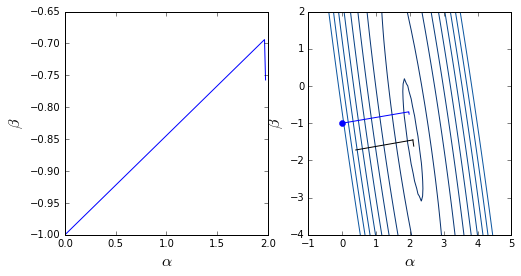

In [13]:
fig = plot_landweber(0.0, -1.0, 1., 10)

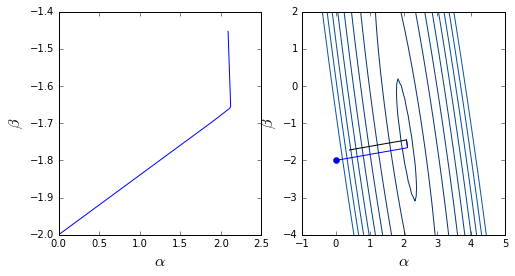

<function opthelper.plot_landweber>

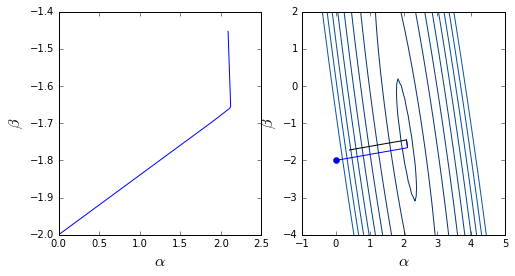

In [5]:
interact(plot_landweber, alpha=(0, 1, 0.1), beta=(-2, -1, 0.1), eps_norm=(0, 2, 0.1), N=(1, 1000, 10))